# Import necessary libraries

In [1]:
import os
import warnings  # To ignore any warnings warnings.filterwarnings("ignore")
from glob import glob  # glob uses the wildcard pattern to create an iterable object file names # containing all matching file names in the current directory.

import numpy as np  # For mathematical calculations
import pandas as pd  # For Pandas DataFrame
from scipy.stats import kurtosis, skew  # To calculate skewness, kurtosis

import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [2]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

# Feature Extraction

In [ ]:
def main(train_label_df, feature):
    # files: to hold list of all datafiles to be read 
    folders=[]
    for sub in train_label_df.Datafile:
        folders.append(sub.split('/')[0])

    for folder in set(folders):
        # read all the training datasets one by one for each subject
        train_data_df = pd.DataFrame(fetch_train_data(folder , feature))
        
        # add the labels to training data
        train_data_df['activity'] = train_label_df.loc[train_label_df.Subject == folder]['Label'].to_list()
        
        # write the file with extracted features 
        train_data_df.head(1)
#         train_data_df.to_csv("dataset/processed_train/"+ folder + ".csv", index=False)

    print("Excuted Successfully")

# Here is the function to fecth the summarised training data of each subject
def fetch_train_data(folder, feature):
    # DataFrame to hold each processed dataset
    dataframe = pd.DataFrame()
    
    # filenames: holds all the activity files given subject
    file_names = glob("./../dataset/train/" + folder +"/*.csv")
    
    #read each activity file of the subject
    for file_name in file_names:
        df = pd.read_csv(file_name, header=None)
            
        #append the processed dataset to dataframe 
        dataframe = dataframe.append(extract_features(df, feature), ignore_index=True)
    
    return dataframe
    
def extract_features(df, feature):
    stats_df = pd.DataFrame()
    switcher_df = df
    stats_df = time_stats(switcher_df, feature)  
    return(stats_df.transpose())

def time_stats(switcher_df, switcher_feature):
    switcher={
        'mean': switcher_df.mean(),
        'median': switcher_df.median(),
        'min': switcher_df.min(),
        'max': switcher_df.max(),
        'std': switcher_df.std(),
        'variance': switcher_df.var(),
        'mad': switcher_df.mad(),
        'rms': np.sqrt(np.sum(np.power((switcher_df),2))/len(switcher_df)),
        'zcr': np.diff(np.signbit(switcher_df)).sum(),
        'iqr': switcher_df.quantile(0.75) - switcher_df.quantile(0.25),
        'pe': switcher_df.quantile(0.75),
        'kurtosis': kurtosis(switcher_df),
        'skew': skew(switcher_df)
     }
    return switcher.get(switcher_feature,"Invalid feature")

    
if __name__ == '__main__':
    # read labled training data
    train_label_df = pd.read_csv("./../dataset/train.csv")
    
    # Select required feature from the below set
    # {'mean','median','min','max','std','variance','mad','rms','zcr','iqr','pe','kurtosis','skew'}
    feature = 'mean'
    main(train_label_df, feature)

In [3]:
import pandas as pd
from glob import glob

train_df = pd.DataFrame()

files = glob("./../dataset/processed_train/*.csv")

for file in files:
    train_df = train_df.append(pd.read_csv(file), ignore_index=True)
    
x = train_df.drop(['activity'],axis=1)
y = train_df['activity']

# Data Exploration

#### "Label" class distribution

In [4]:
label_df = pd.read_csv("./../dataset/final_train.csv")
label_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,activity
0,32765.816400,32659.326457,33083.021661,32799.320268,32797.461578,32914.948943,37119.026302,34762.177411,33715.164002,32703.247035,37350.730273,33972.179474,30815.120165,28985.796802,29068.343476,29075.845797,29154.049510,29552.399175,29244.181537,stand
1,32764.391304,32799.766202,32747.948318,32790.022149,32828.584906,34459.319114,37004.073831,34118.940115,31788.301887,33783.479902,37235.071370,33866.372436,31480.982773,29029.985234,29199.390484,29093.558655,29243.230517,29594.509434,29237.535685,stand
2,32764.341989,32760.827106,32783.377454,32780.046232,32811.665611,32944.577581,36035.232426,30744.173528,32003.509816,32127.979734,36677.511083,35429.799873,20781.964535,29343.658645,30156.189994,28603.008233,29421.646612,29010.158328,28967.979734,sit-to-stand
3,32765.078671,32674.193625,32799.791455,32797.854866,32814.384876,34322.423872,36796.526280,36160.529671,32867.724652,32553.298067,37066.239403,35635.854866,27247.086470,29801.417430,28974.111224,29333.374703,28935.151577,29471.150899,28629.889454,run
4,32765.017851,32759.033681,32761.430448,32997.581341,32782.046480,32167.073762,37062.674975,30890.084203,33204.843382,32203.955541,35819.286628,29287.400472,26407.063658,29134.992253,28769.597171,29196.581341,29258.377231,29789.596497,29439.708319,lateral-shuffle-left


In [5]:
label_df['activity'].nunique()

23

In [6]:
counts = label_df['activity'].value_counts()
normalized_count = label_df['activity'].value_counts(normalize=True) * 100

In [7]:
normalized_count

curve-left-spin-Rfirst     4.999219
curve-right-spin-Lfirst    4.702390
v-cut-left-Lfirst          4.686768
v-cut-right-Lfirst         4.686768
curve-right-spin-Rfirst    4.686768
walk                       4.686768
run                        4.686768
curve-left-step            4.671145
curve-right-step           4.608655
stand-to-sit               4.514920
stand                      4.514920
sit                        4.514920
sit-to-stand               4.514920
lateral-shuffle-left       4.405562
curve-left-spin-Lfirst     4.374317
jump-two-leg               4.374317
v-cut-left-Rfirst          4.374317
v-cut-right-Rfirst         4.374317
jump-one-leg               4.358694
stair-down                 4.343071
stair-up                   4.343071
lateral-shuffle-right      4.327449
lay                        0.249961
Name: activity, dtype: float64

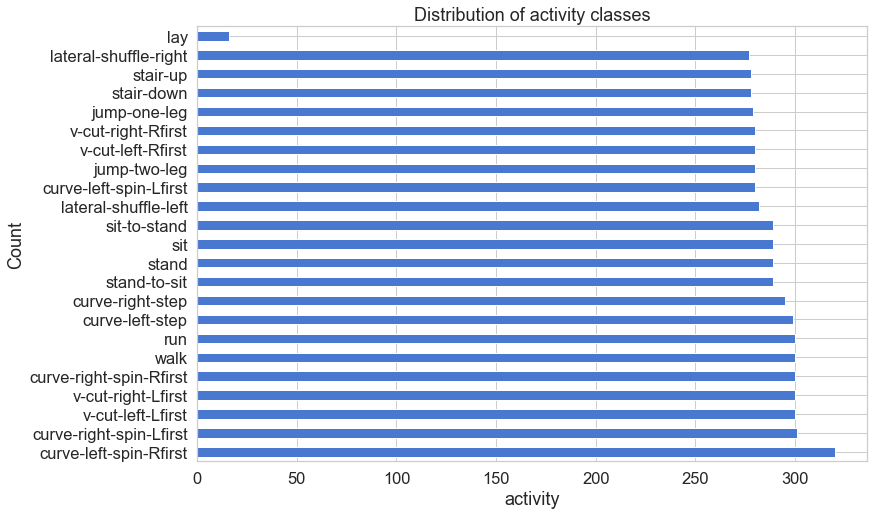

In [8]:
# group data by the class value and calculate the number of rows
counts = label_df['activity'].value_counts()
# summarize
counts.plot(kind='barh', title='Distribution of activity classes', figsize=(12,8))
# sns.distplot(counts)
plt.xlabel('activity')
plt.ylabel('Count')
plt.show()

### Plot Time Series Data for few activities of a subject

In [15]:
def plot_activity(df, activity):
    data = df[df['activity'] == activity]
    data = data[['0','1','2']]
    data = data[:200]
    
    ax = data.plot(subplots=True, figsize=(16,12), title=activity)

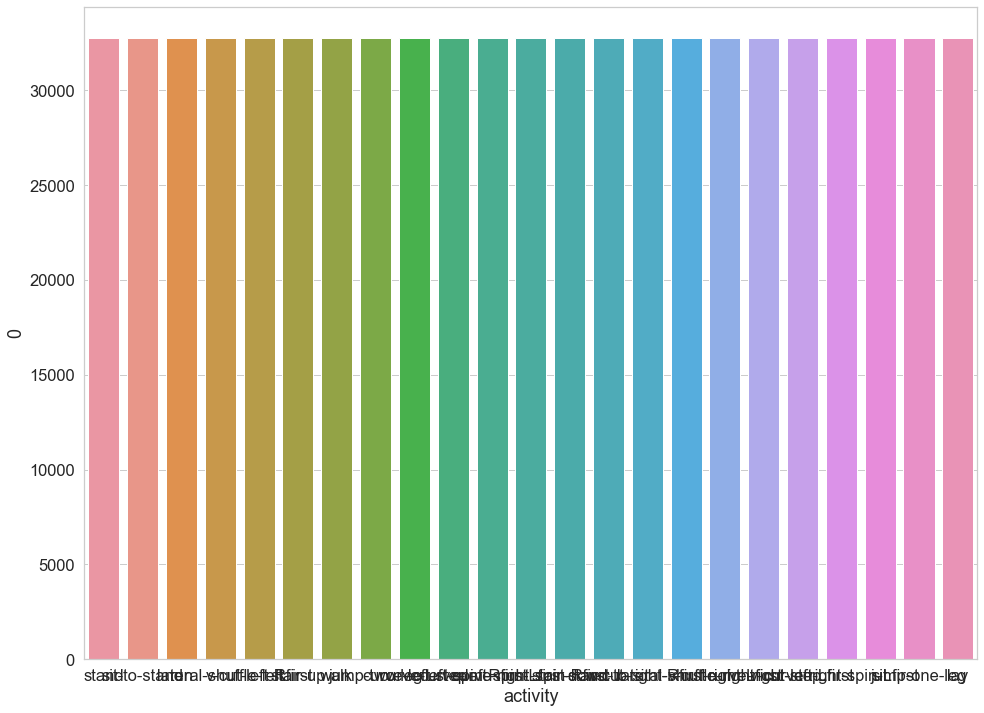

In [18]:
import seaborn as sns
plt.figure(figsize=(16,12))
sns.barplot(x='activity',y='0',data=label_df[:2000])

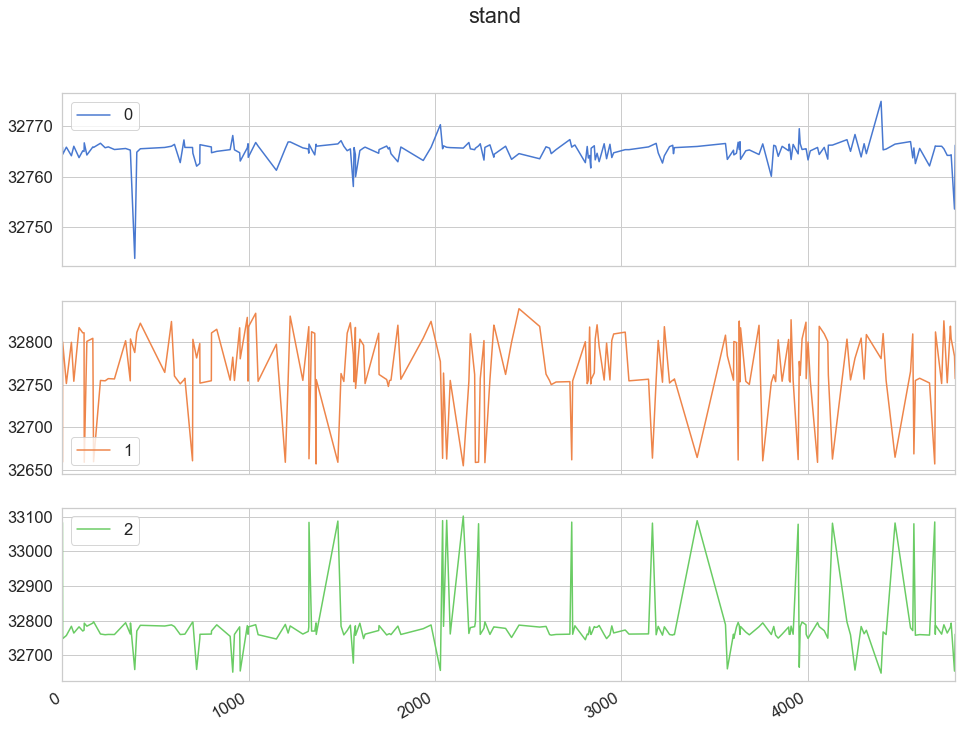

In [16]:
plot_activity(label_df, "stand")

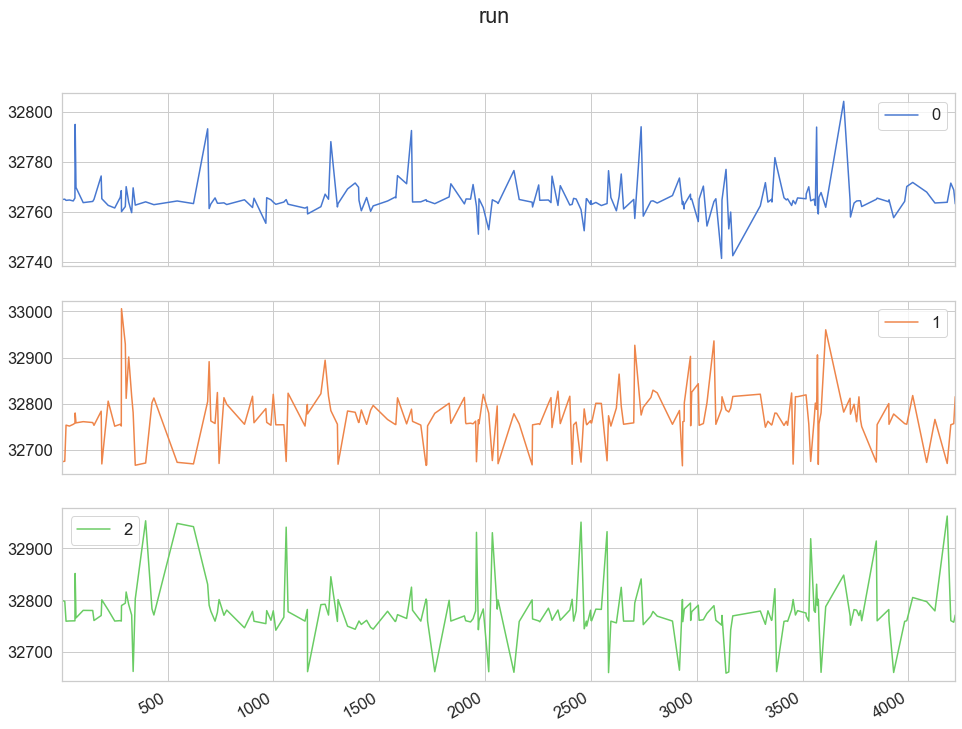

In [19]:
plot_activity(label_df, "run")

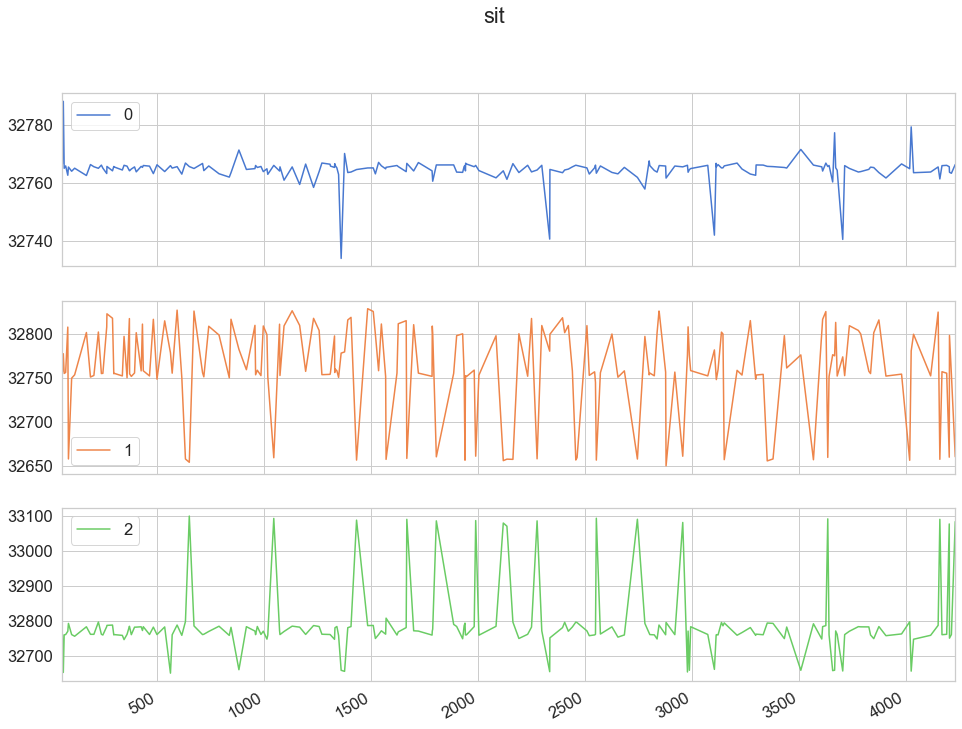

In [20]:
plot_activity(label_df, "sit")

## Cross Validation Framework

In [ ]:
# import pandas as pd
# from sklearn import model_selection

# if __name__ == "__main__":
#     train_df = pd.DataFrame()

#     files = glob("./../dataset/processed_train/*.csv")

#     for file in files:
#         train_df = train_df.append(pd.read_csv(file), ignore_index=True)

#     train_df["kfold"] = -1

#     train_df = train_df.sample(frac=1).reset_index(drop=True)

#     #create instance of stratifiedKFold
#     kf = model_selection.StratifiedKFold(n_splits=5, shuffle=False, random_state=42)
    
#     #assign fold values to each row in training dataset
#     for fold, (train_idx, val_idx) in enumerate(kf.split(X=train_df, y=train_df.activity.values)):
#         print(len(train_idx), len(val_idx))
#         train_df.loc[val_idx, 'kfold'] = fold
    
#     train_df.to_csv("./../dataset/train_folds.csv", index=False)

In [ ]:
# from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

# from sklearn import metrics
# from sklearn.metrics import make_scorer

# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

# FOLD_MAPPPING = {
#     0: [1, 2, 3, 4],
#     1: [0, 2, 3, 4],
#     2: [0, 1, 3, 4],
#     3: [0, 1, 2, 4],
#     4: [0, 1, 2, 3]
# }

# FOLD = 0

# if __name__ == "__main__":
#     df = pd.read_csv("./../dataset/train_folds.csv")
    
#     train_df = df[df.kfold.isin(FOLD_MAPPPING.get(FOLD))].reset_index(drop=True)
#     valid_df = df[df.kfold==FOLD].reset_index(drop=True)

#     y_train = train_df.activity.values
#     y_valid = valid_df.activity.values

#     train_df = train_df.drop(["activity", "kfold"], axis=1)
#     valid_df = valid_df.drop(["activity", "kfold"], axis=1)

#     valid_df = valid_df[train_df.columns]
    
#     le = preprocessing.LabelEncoder()
#     y_train = le.fit_transform(y_train)
#     y_valid = le.fit_transform(y_valid)
    
    
#     model_score = make_scorer(metrics.roc_auc_score, greater_is_better=True)
    
#     pipeline_lr=Pipeline([('scaler1',StandardScaler()), ('lr_classifier',LogisticRegression(random_state=42))])
    
#     pipeline_randomforest=Pipeline([('scaler2',StandardScaler()), ('rf_classifier',RandomForestClassifier())])
    
#     model_pipeline = [pipeline_lr, pipeline_randomforest]
    
#     # Dictionary of pipelines and classifier types for ease of reference
#     pipe_dict = {0: 'Logistic Regression', 1: 'RandomForest'}
    
    
#     # fit the pipeline with the training data
#     for pipe in model_pipeline:
#          pipe.fit(train_df, y_train)
            
#     for i, model in enumerate(model_pipeline):
#         print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(valid_df, y_valid)))

# Training phase

#### Creating a pipeling of classifiers and select the best model and it's hyper-parameters using GridSearchCV

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics, model_selection, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

if __name__ == "__main__":
    df = pd.read_csv("dataset/final_train.csv")

    y_train = df.activity.values
    
    x_train = df.drop(["activity"], axis=1)
    
    le = preprocessing.LabelEncoder()
    
    y_train = le.fit_transform(y_train)

    pipeline_lr=Pipeline([('scaler1',StandardScaler()), ('clf',LogisticRegression(random_state=42))])
    
    pipeline_randomforest=Pipeline([('scaler2',StandardScaler()), ('clf',RandomForestClassifier())])
    
    model_pipeline = [pipeline_lr, pipeline_randomforest]
    
    # Dictionary of pipelines and classifier types for ease of reference
    pipe_dict = {0: 'Logistic Regression', 1: 'RandomForest'}
    
    parameters = [{
                     'clf__penalty': ['l2'],
                     'clf__C': np.logspace(0, 4, 10)
                    },
                    {
                     'clf__n_estimators': [10, 30],
                     'clf__max_features': [0.25, 1.0]
                    }
                   # {'estimator':[Any_other_estimator_you_want],
                   #  'estimator__valid_param_of_your_estimator':[valid_values]}

                  ]
    
    
    # fit the pipeline with the training data
    for model, pipe in zip(model_pipeline, pipe_dict):
        grid_search = GridSearchCV(estimator=model, param_grid=parameters[pipe], cv = model_selection.StratifiedKFold(n_splits=5, shuffle=False, random_state=42) )
        grid_search.fit(x_train, y_train)
#         print(grid_search.best_params_)
        print("{}: model best parameters are --> {}".format(pipe_dict[pipe], grid_search.best_params_))
#         print(grid_search.best_score_)
        print("{}: cv accuracy is  {}".format(pipe_dict[pipe], grid_search.best_score_))


In [ ]:
df = pd.read_csv("./../dataset/final_train.csv")

x_train = df.drop(["activity"], axis=1)

scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

print(x_train.head())

y_train = df.activity.values

le = preprocessing.LabelEncoder()
    
y_train = le.fit_transform(y_train)

print(y_train)

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics, model_selection, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

if __name__ == "__main__":
    df = pd.read_csv("dataset/final_train.csv")

    y_train = df.activity.values

    le = preprocessing.LabelEncoder()
    
    y_train = le.fit_transform(y_train)
    
    x_train = df.drop(["activity"], axis=1)
    scaler = preprocessing.StandardScaler()
    x_train = scaler.fit_transform(x_train)
#     x_train = pd.DataFrame(df)

    
    
    model_pipeline = [('clf',LogisticRegression(random_state=42)), ('clf',RandomForestClassifier()), ('clf', xgb.XGBClassifier())]
    
    # Dictionary of pipelines and classifier types for ease of reference
    pipe_dict = {0: 'Logistic Regression', 1: 'RandomForest', 2: 'XGBoost'}
    
    parameters = [{
                     'clf__penalty': ['l2'],
                     'clf__C': np.logspace(0, 4, 10)
                    },
                    {
                     'clf__n_estimators': [10, 30],
                     'clf__max_features': [0.25, 1.0]
                    },
                    {'nthread': [4], #when use hyperthread, xgboost may become slower
                    'objective': ['binary:logistic'],
                    'learning_rate': [0.05], #so called `eta` value
                    'max_depth': [6],
                    'min_child_weight': [11],
                    'silent': [1],
                    'subsample': [0.8],
                    'colsample_bytree': [0.7],
                    'n_estimators': [5], #number of trees, change it to 1000 for better results
                    'seed': [1337]}
                   # {'estimator':[Any_other_estimator_you_want],
                   #  'estimator__valid_param_of_your_estimator':[valid_values]}

                  ]
    
    
    # fit the pipeline with the training data
    for model, pipe in zip(model_pipeline, pipe_dict):
        grid_search = GridSearchCV(estimator=model, param_grid=parameters[pipe], cv = model_selection.StratifiedKFold(n_splits=5, shuffle=False, random_state=42) )
        grid_search.fit(x_train, y_train)

        print("{}: model best parameters are --> {}".format(pipe_dict[pipe], grid_search.best_params_))

        print("{}: cv accuracy is  {}".format(pipe_dict[pipe], grid_search.best_score_))
